In [1]:
import mondongo
import cleanfiles
import eda
import transformers
import torch
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

In [2]:
mondongo.upload_data()

Descargando CSV desde: https://media.githubusercontent.com/media/moonlightKiR/GTD/refs/heads/main/global_terrorism_data.csv...
CSV descargado correctamente.
Transformando CSV a JSON (Streaming)...
Archivo JSON creado correctamente.
Borrando coleccion existente...
Conectado a MongoDB.
Subiendo registros...
   - 5000 registros subidos...
   - 10000 registros subidos...
   - 15000 registros subidos...
   - 20000 registros subidos...
   - 25000 registros subidos...
   - 30000 registros subidos...
   - 35000 registros subidos...
   - 40000 registros subidos...
   - 45000 registros subidos...
   - 50000 registros subidos...
   - 55000 registros subidos...
   - 60000 registros subidos...
   - 65000 registros subidos...
   - 70000 registros subidos...
   - 75000 registros subidos...
   - 80000 registros subidos...
   - 85000 registros subidos...
   - 90000 registros subidos...
   - 95000 registros subidos...
   - 100000 registros subidos...
   - 105000 registros subidos...
   - 110000 registro

In [3]:
cleanfiles.clean_files()

In [4]:
df = eda.get_dataframe()

Conectando a MongoDB para extraer datos...
DataFrame creado con exito: 181691 filas y 136 columnas.


Analizando calidad del dato (Nulos y Vacios)...

Se han detectado 106 columnas con datos faltantes.
Top 100 variables con mas nulos/vacios:
 - gsubname3: 181671 faltantes (99.99%)
 - weapsubtype4: 181621 faltantes (99.96%)
 - weapsubtype4_txt: 181621 faltantes (99.96%)
 - weaptype4: 181618 faltantes (99.96%)
 - weaptype4_txt: 181618 faltantes (99.96%)
 - claimmode3: 181558 faltantes (99.93%)
 - claimmode3_txt: 181558 faltantes (99.93%)
 - gsubname2: 181531 faltantes (99.91%)
 - claim3: 181373 faltantes (99.82%)
 - guncertain3: 181371 faltantes (99.82%)
 - gname3: 181367 faltantes (99.82%)
 - divert: 181367 faltantes (99.82%)
 - attacktype3: 181263 faltantes (99.76%)
 - attacktype3_txt: 181263 faltantes (99.76%)
 - ransomnote: 181177 faltantes (99.72%)
 - ransompaidus: 181139 faltantes (99.70%)
 - ransomamtus: 181128 faltantes (99.69%)
 - claimmode2: 181075 faltantes (99.66%)
 - claimmode2_txt: 181075 faltantes (99.66%)
 - ransompaid: 180917 faltantes (99.57%)
 - corp3: 180665 faltantes

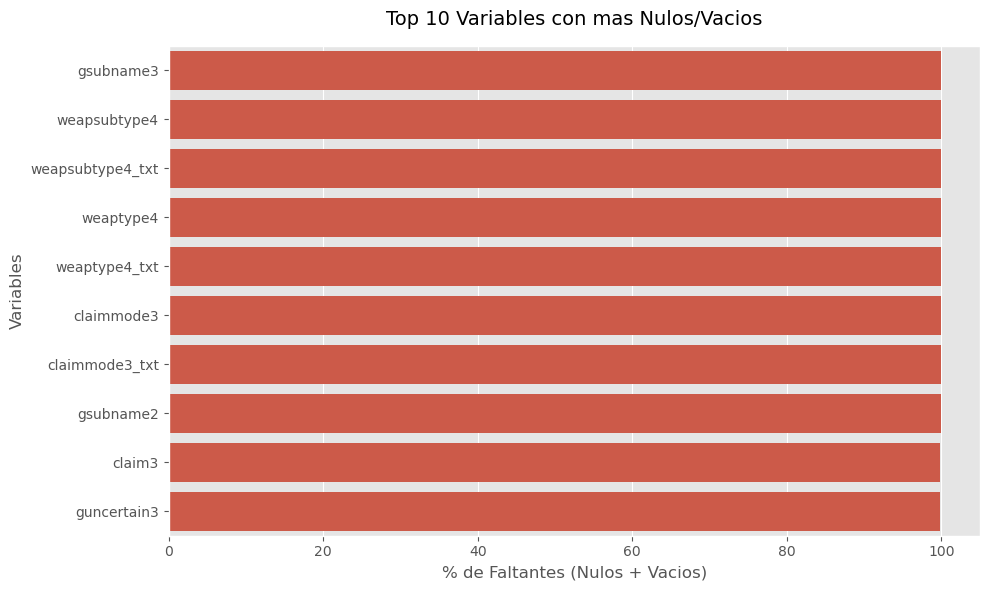

In [5]:
missing_col = eda.analyze_data_quality(df)

In [6]:
missing_col

['gsubname3',
 'weapsubtype4',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3',
 'natlty3_txt',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype3',
 'weaptype3_txt',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'target2',
 'targtype2',
 'targtype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode',
 'claimmode_txt',
 'rela

In [7]:
eda.check_duplicates(df)

Analizando duplicados...
Analisis de duplicados en 'eventid': 0 encontrados.


0

In [8]:
df.describe()

statistic,_id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""",…,"""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""698b4ac678113f3bb3a19cd2""","""197000000001""","""1970""","""0""","""0""","""""","""0""","""""","""10""","""Afghanistan""","""1""","""Australasia & Oceania""","""""","""""","""""","""""","""""","""-9""","""""","""""","""0""","""0""","""0""","""""","""""","""""","""""","""0""","""0""","""1""","""Armed Assault""","""""","""""","""""","""""","""1""",…,"""""","""""","""""","""""","""""","""""","""-9""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""Anti-Abortion Project 2010""","""-9""","""-9""","""-9""","""-9""",""""""
"""25%

In [9]:
df_clean = eda.select_star_schema_variables(df)

Seleccionando variables para el modelo
Modelo de estrella filtrado: 22 columnas seleccionadas.


In [10]:
df_clean.schema

Schema([('nkill', String),
        ('nwound', String),
        ('success', String),
        ('propvalue', String),
        ('iyear', String),
        ('imonth', String),
        ('iday', String),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', String),
        ('longitude', String),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

In [11]:
df_clean = eda.cast_numeric_columns(df_clean)

Corrigiendo tipos de datos numéricos...
 - Columna 'nkill' convertida a Int64.
 - Columna 'nwound' convertida a Int64.
 - Columna 'propvalue' convertida a Int64.
 - Columna 'iyear' convertida a Int64.
 - Columna 'imonth' convertida a Int64.
 - Columna 'iday' convertida a Int64.
 - Columna 'success' convertida a Int64.
 - Columna 'latitude' convertida a Float64.
 - Columna 'longitude' convertida a Float64.


In [12]:
df_clean.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Int64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

In [13]:
eda.list_categorical_uniques(df_clean)

Buscando valores únicos en columnas de texto...

Columna String: 'country_txt'
  Total únicos: 205
  Valores (Top 15): ['France', 'Yemen', 'St. Kitts and Nevis', 'Portugal', 'Nicaragua', 'Saudi Arabia', 'Montenegro', 'Yugoslavia', 'Bahrain', 'Madagascar', 'Somalia', 'Tajikistan', 'Zambia', 'Zaire', 'Kenya']...

Columna String: 'region_txt'
  Total únicos: 12
  Valores: ['South America', 'Eastern Europe', 'Southeast Asia', 'Western Europe', 'Central Asia', 'North America', 'Australasia & Oceania', 'Middle East & North Africa', 'East Asia', 'Sub-Saharan Africa', 'Central America & Caribbean', 'South Asia']

Columna String: 'provstate'
  Total únicos: 2855
  Valores (Top 15): ['Greater Wellington (Region)', 'Tucuman', 'Dagestan (Republic)', 'Pskov', 'Districts of Republican Subordination', 'Pattani (province)', 'Saint Laurent Du Maroni', 'Norte de Santander', 'Cantabria', 'Riau (Province)', 'Loreto', 'Pyrenees-Atlantiques', 'Aqaba', 'Tula (Oblast)', 'Uttar Pradesh']...

Columna String: 'c

{'country_txt': ['France',
  'Yemen',
  'St. Kitts and Nevis',
  'Portugal',
  'Nicaragua',
  'Saudi Arabia',
  'Montenegro',
  'Yugoslavia',
  'Bahrain',
  'Madagascar',
  'Somalia',
  'Tajikistan',
  'Zambia',
  'Zaire',
  'Kenya',
  'Belize',
  'Seychelles',
  'Argentina',
  'Uruguay',
  'Mexico',
  'Paraguay',
  'Gabon',
  'Andorra',
  'Belarus',
  'Norway',
  'Comoros',
  'Latvia',
  'Israel',
  'Serbia-Montenegro',
  'Dominica',
  'Cameroon',
  'International',
  'Taiwan',
  'Iran',
  'Slovenia',
  'Bosnia-Herzegovina',
  'Romania',
  'Germany',
  'Sweden',
  'Slovak Republic',
  'Venezuela',
  'Singapore',
  'Togo',
  'Switzerland',
  'Martinique',
  'Austria',
  'Kyrgyzstan',
  'Egypt',
  'Bolivia',
  'Brazil',
  'Australia',
  'Myanmar',
  'Spain',
  'Trinidad and Tobago',
  'Democratic Republic of the Congo',
  'East Timor',
  'Iraq',
  'Kuwait',
  'Bulgaria',
  'Philippines',
  'Pakistan',
  'Brunei',
  'Laos',
  'Moldova',
  'Liberia',
  'Ivory Coast',
  'Guinea',
  "People

In [14]:
df_num, mis_mapeos = eda.encode_categorical_columns(df_clean)

Codificando columnas detectadas como texto: ['country_txt', 'region_txt', 'provstate', 'city', 'gname', 'gsubname', 'attacktype1_txt', 'suicide', 'targtype1_txt', 'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt']...
 - 'country_txt' codificado (205 categorías).
 - 'region_txt' codificado (12 categorías).
 - 'provstate' codificado (2856 categorías).
 - 'city' codificado (36675 categorías).
 - 'gname' codificado (3537 categorías).
 - 'gsubname' codificado (1184 categorías).
 - 'attacktype1_txt' codificado (9 categorías).
 - 'suicide' codificado (2 categorías).
 - 'targtype1_txt' codificado (22 categorías).
 - 'corp1' codificado (33242 categorías).
 - 'target1' codificado (86009 categorías).
 - 'weaptype1_txt' codificado (12 categorías).
 - 'weapsubtype1_txt' codificado (31 categorías).


In [15]:
df_pandas = df_num.to_pandas()

In [16]:
df_pandas

,nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,provstate,...,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
0,1,0,1,0,1970,7,2,90,1,NaN,...,-69.951164,3022,NaN,6,1,20,NaN,14032.0,2,NaN
1,0,0,1,0,1970,0,0,161,0,1302.0,...,-99.086624,671,NaN,3,1,15,31989.0,27168.0,2,NaN
2,1,0,1,0,1970,1,0,184,8,855.0,...,120.599741,2425,NaN,6,1,6,4563.0,50039.0,2,NaN
3,0,0,1,0,1970,1,0,175,9,2788.0,...,23.762728,2425,NaN,4,1,15,NaN,54988.0,3,25.0
4,0,0,1,0,1970,1,0,56,5,667.0,...,130.396361,2425,NaN,0,1,15,NaN,65570.0,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1,2,1,0,2017,12,31,17,11,1058.0,...,45.385034,1428,NaN,7,1,4,1885.0,26049.0,4,0.0
181687,2,7,1,-99,2017,12,31,32,6,2205.0,...,35.942679,1328,NaN,4,1,4,16156.0,79348.0,3,11.0
181688,0,0,1,-99,2017,12,31,184,8,763.0,...,124.437908,1034,NaN,0,1,20,8713.0,44589.0,11,20.0
181689,0,0,0,0,2017,12,31,167,7,2633.0,...,93.940430,2425,NaN,4,1,21,11459.0,36653.0,3,15.0


In [17]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2ORandomForestEstimator

In [18]:
h2o.init()
hf = H2OFrame(df_pandas)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.8.1" 2023-08-24; OpenJDK Runtime Environment (build 17.0.8.1+1-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 17.0.8.1+1-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzber6sfv
  JVM stdout: /tmp/tmpzber6sfv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzber6sfv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,00 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_hli707
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.914 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
# Columnas predictoras
predictors = [col for col in hf.columns if col not in ["success", "targtype1_txt"]]

# Target para clasificación
classification_target = "success"
hf[classification_target] = hf[classification_target].asfactor()  # convertido a factor

# Target para regresión
regression_target = "targtype1_txt"
hf[regression_target] = hf[regression_target].asnumeric()  # aseguro que sea numérico


In [20]:
# 80% train, 20% test
train, test = hf.split_frame(ratios=[0.8], seed=1234)

In [21]:
#Clasificacion

# Crear y entrenar clasificacion
rf_clf = H2ORandomForestEstimator(
    ntrees=50,
    max_depth=20,
    seed=1234,
    balance_classes=True  # sjuste por desbalance del target
)

rf_clf.train(x=predictors, y=classification_target, training_frame=train)

# Evaluar test
perf_clf_test = rf_clf.model_performance(test_data=test)

# Accuracy
accuracy_default = perf_clf_test.accuracy()[0][1]
best_f1_threshold = perf_clf_test.F1()[0][0]
accuracy_best = perf_clf_test.accuracy(thresholds=[best_f1_threshold])[0][1]


print(f"Accuracy (default threshold): {accuracy_default:.4f}")
print(f"Accuracy (threshold max F1): {accuracy_best:.4f}")
print(f"AUC: {perf_clf_test.auc():.4f}")
print("F1:", perf_clf_test.F1())
print("Confusion Matrix:")
print(perf_clf_test.confusion_matrix())



drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Accuracy (default threshold): 0.9350
Accuracy (threshold max F1): 0.9350
AUC: 0.9242
F1: [[0.8346613800966753, 0.9641516602081909]]
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8346613800966753
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      2201  1813   0.4517   (1813.0/4014.0)
1      546   31723  0.0169   (546.0/32269.0)
Total  2747  33536  0.065    (2359.0/36283.0)


In [30]:
# Regresion
# Crear y entrenar modelo de regresión
rf_reg = H2ORandomForestEstimator(
    ntrees=50,
    max_depth=20,
    seed=1234
)
rf_reg.train(x=predictors, y=regression_target, training_frame=train)

# Evaluar en test
perf_reg_test = rf_reg.model_performance(test_data=test)

print("R2:", perf_reg_test.r2())
print("MSE:", perf_reg_test.mse())
print("RMSE:", perf_reg_test.rmse())

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R2: 0.4558847609925314
MSE: 32.827874356431394
RMSE: 5.729561445384053


In [27]:
gbm = H2OGradientBoostingEstimator(
    ntrees=200,
    max_depth=5,
    learn_rate=0.1,
    seed=1234
)

gbm.train(x=predictors, y=regression_target, training_frame=train)
perf = gbm.model_performance(test_data=test)

print("R²:", perf.r2())
print("MSE:", perf.mse())
print("RMSE:", perf.rmse())

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R²: 0.41857272628120545
MSE: 35.07900555011113
RMSE: 5.922753206922531
